# 1. 개요
해당 사이트에서 공부를 진행했습니다. <br/>
<https://kaggle-kr.tistory.com/17?category=868316>

# 2. Exploratory data analysis
데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다. 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다.

## 2-1. 라이브러리 설치

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2-2. 데이터 불러오기

In [5]:
df_train = pd.read_csv(r'C:\Users\YONSAI\Desktop\kaggle\Transcription\titanic\data\train.csv')
df_test = pd.read_csv(r'C:\Users\YONSAI\Desktop\kaggle\Transcription\titanic\data\test.csv')

## 2-3. Pclass
먼저 Pclass에 대해 살펴보겠습니다. Pclass는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다. <br/>
<br/>

먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다. pandas에서 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot이란 메소드도 있습니다. <br/>
<br/>

Pclass, Survived를 가져온 후, Pclass로 묶습니다. 그리고 각 Pclass마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다.

In [6]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [7]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [8]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


pd.crosstab()은 두 개 이상의 요소 간의 교차표(또는 연관표)를 계산하는 데 사용됩니다. 이 함수는 다른 카테고리별로 변수의 빈도 분포를 보여주는 테이블을 생성합니다. <br/>

<AxesSubplot:xlabel='Pclass'>

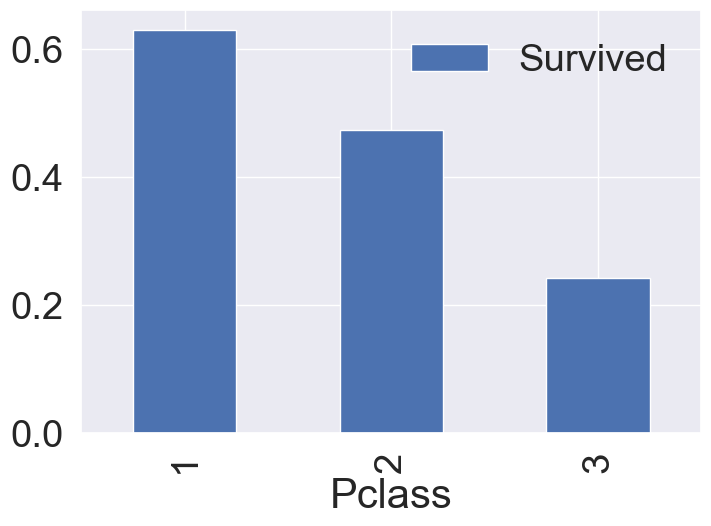

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

Pclass가 좋을수록 생존률이 높은 것을 확인할 수 있습니다. 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있습니다.

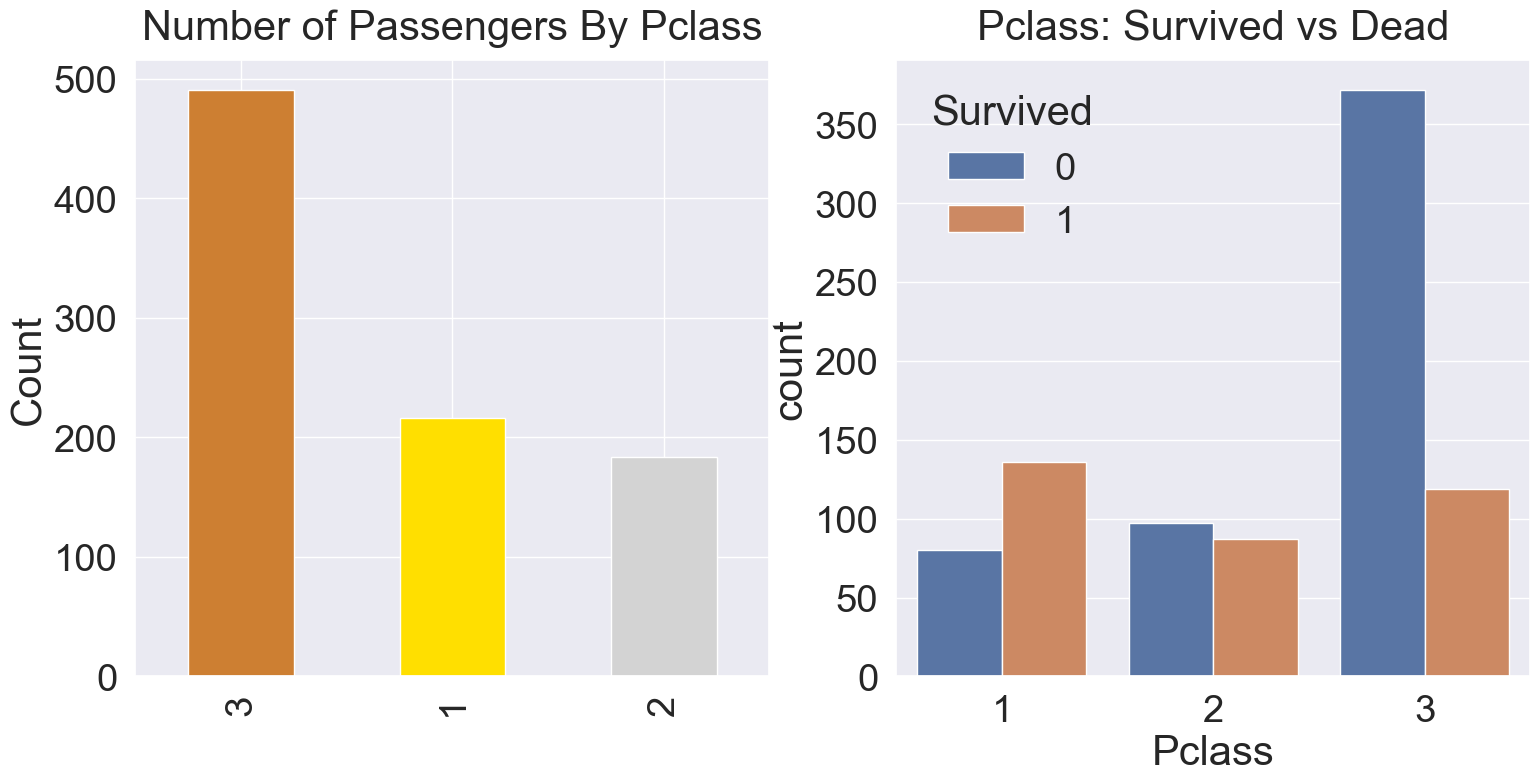

In [11]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

클래스가 높을수록, 생존 확률이 높은걸 확인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25%입니다. <br/>
생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

## 2-4. Sex
이번엔 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다. <br/>
마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해보겠습니다.

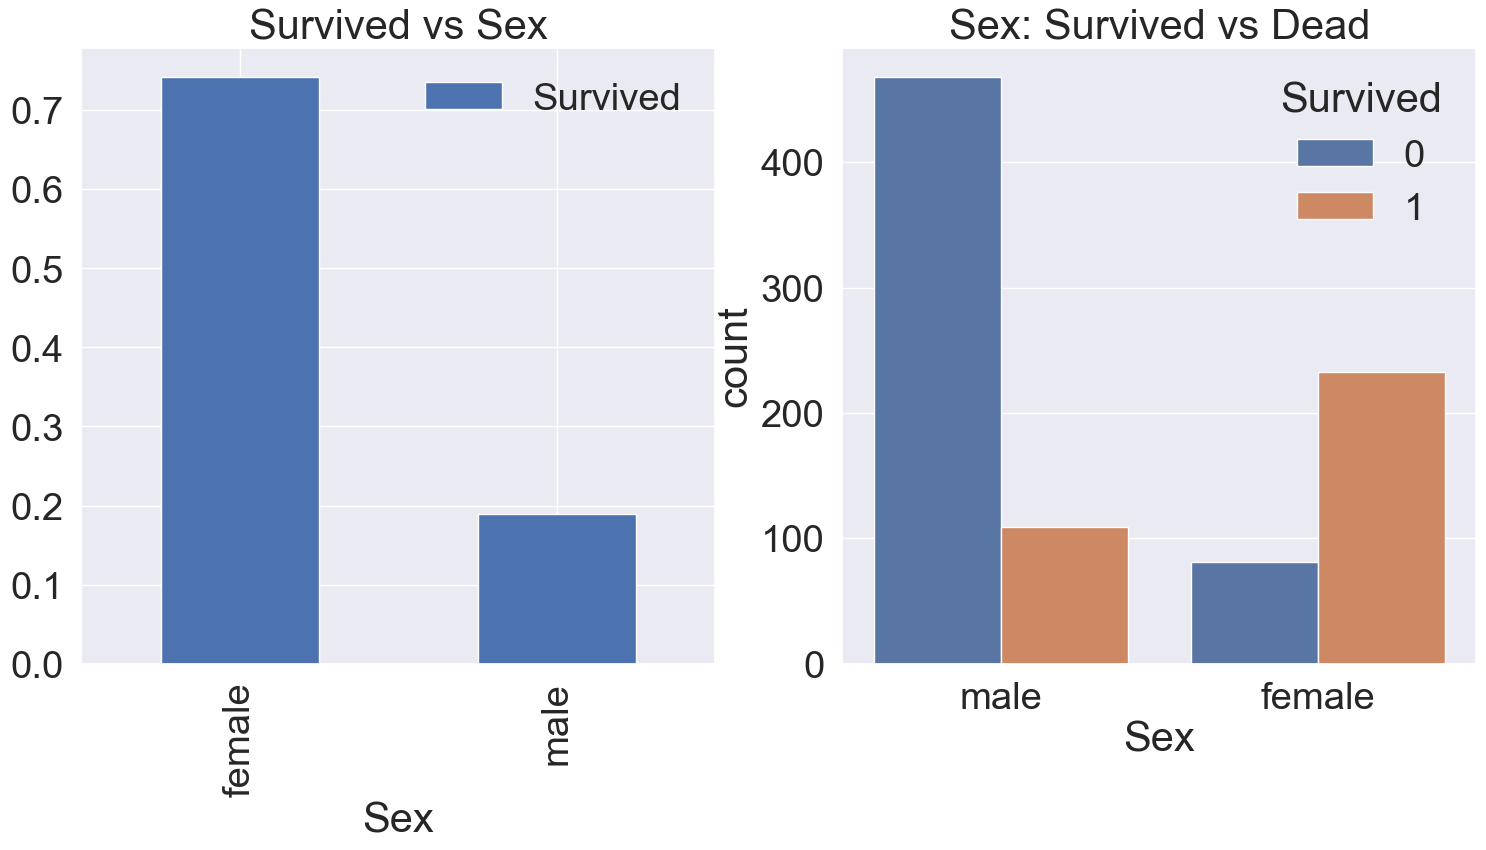

In [12]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

보시다시피, 여자가 생존할 확률이 높습니다.

In [13]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있습니다.

## 2-5. Both Sex and Pclass
이번엔 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 보겠습니다. seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

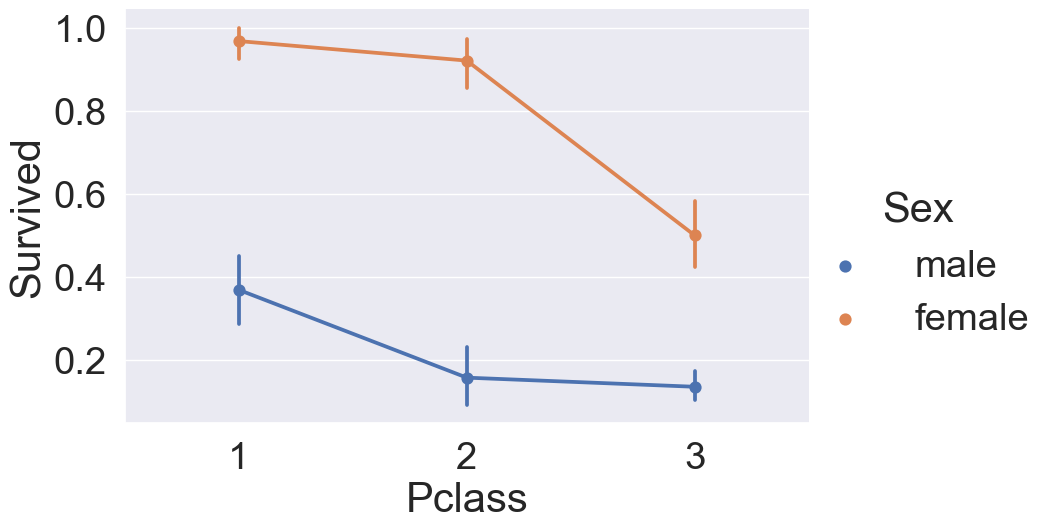

In [15]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train,
               size = 6, aspect = 1.5)

모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있습니다. 또한 남자, 여자 상관없이 클래스가 높을수록 살 확률 높습니다. 위 그래프는 hue 대신 column으로 하면 아래와 같아집니다.

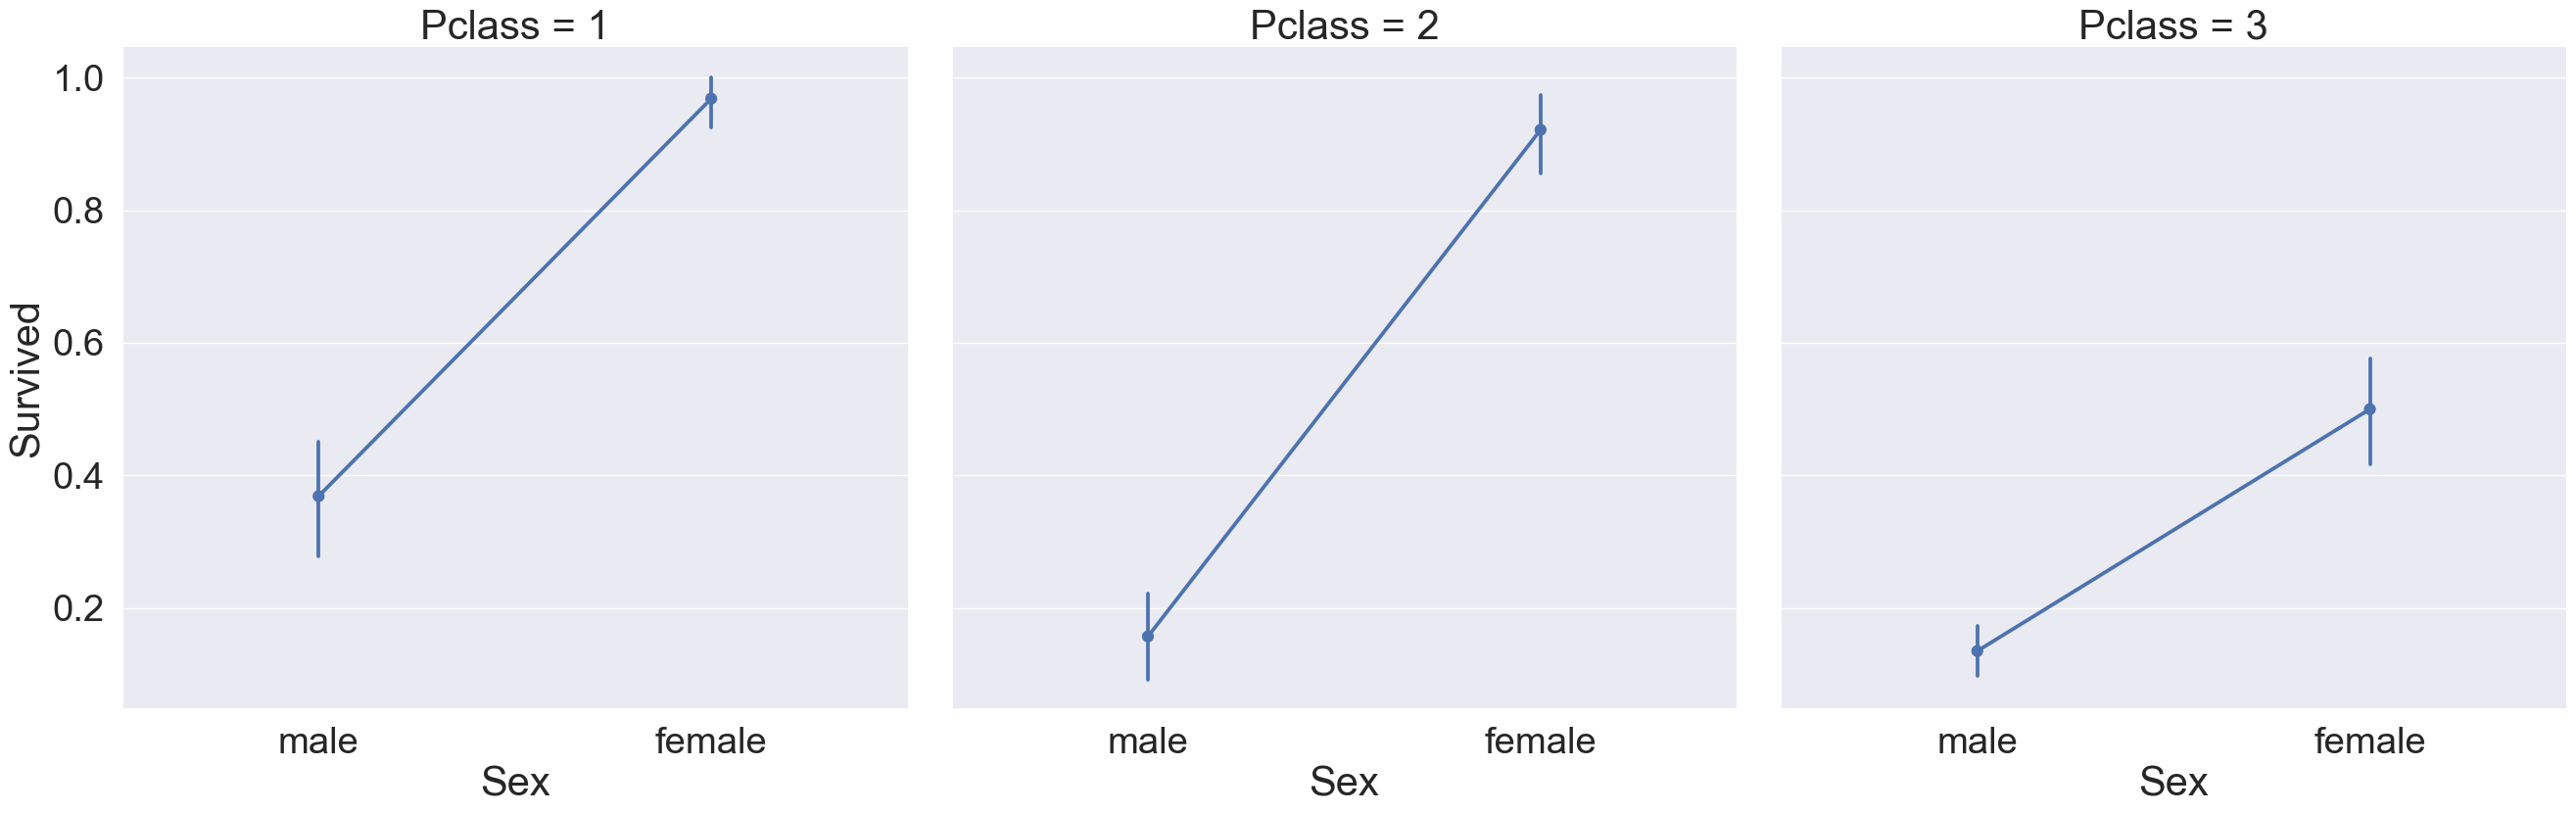

In [16]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass',
               data = df_train, satureation = .5,
               size = 9, aspect = 1)

## 2-6. Age
이번에는 Age feature를 살펴보겠습니다.

In [17]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


생존에 따른 Age의 histogram을 그려보겠습니다.

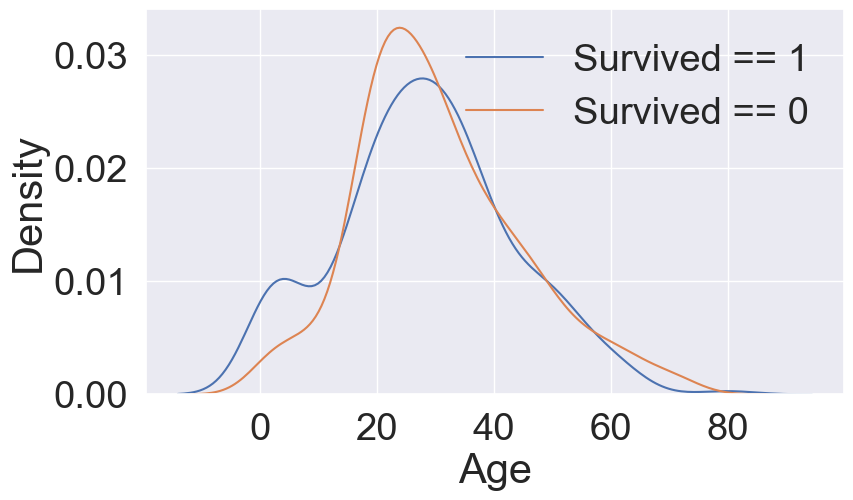

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

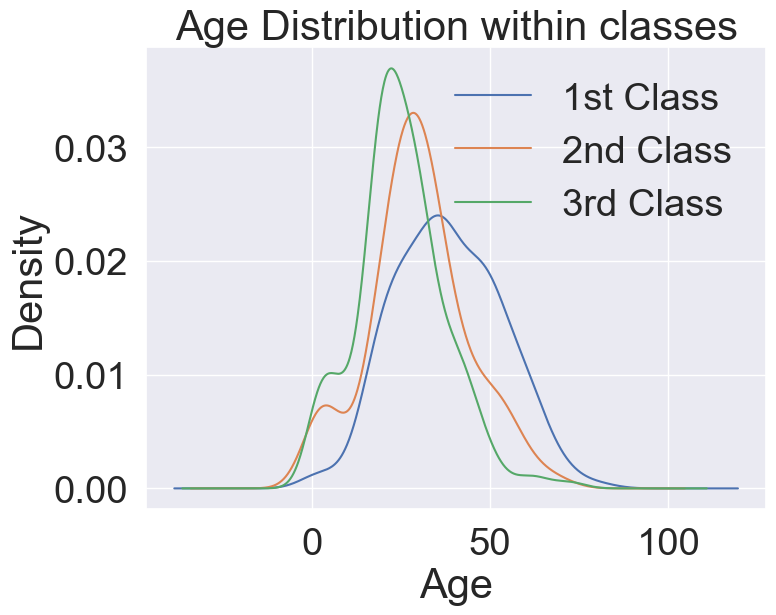

In [19]:
# Age distribution withing classes
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class가 높을수록 나이 많은 사람의 비중이 커짐

나이대가 변하면서 생존률이 어떻게 되는 지 보겠습니다. 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한 번 보겠습니다.

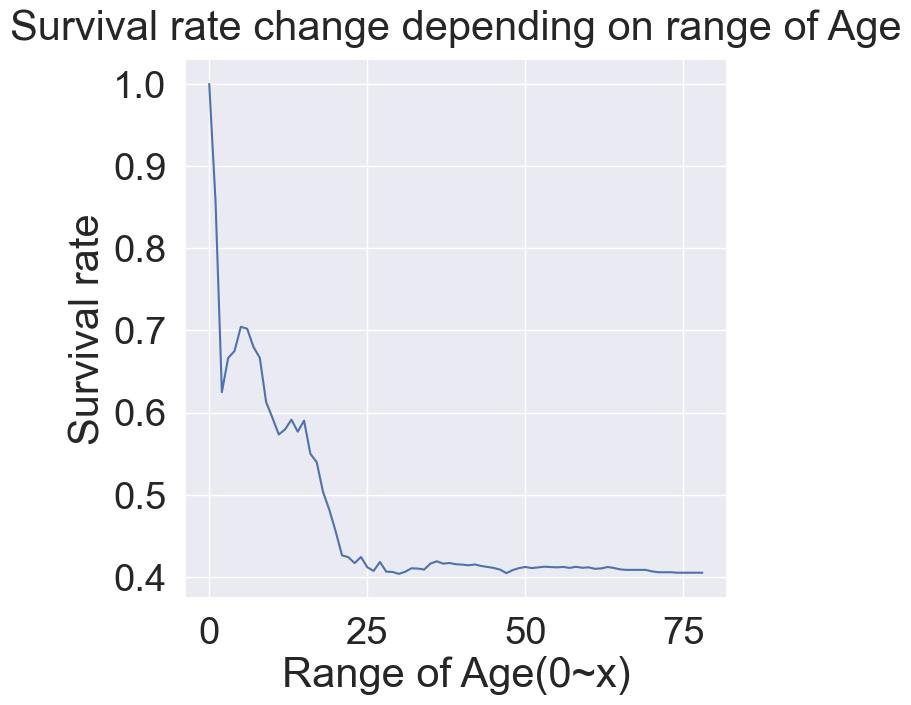

In [20]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

보시다시피, 나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있습니다. 우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인했습니다.

## 2-7. Pclass, Sex, Age
지금까지 본, Sex, Pclass, Age, Survived 모두에 대해 보겠습니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot입니다. <br/>
x축은 우리가 나눠서 보고 싶어하는 case(여기선 Pclass, Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)입니다.

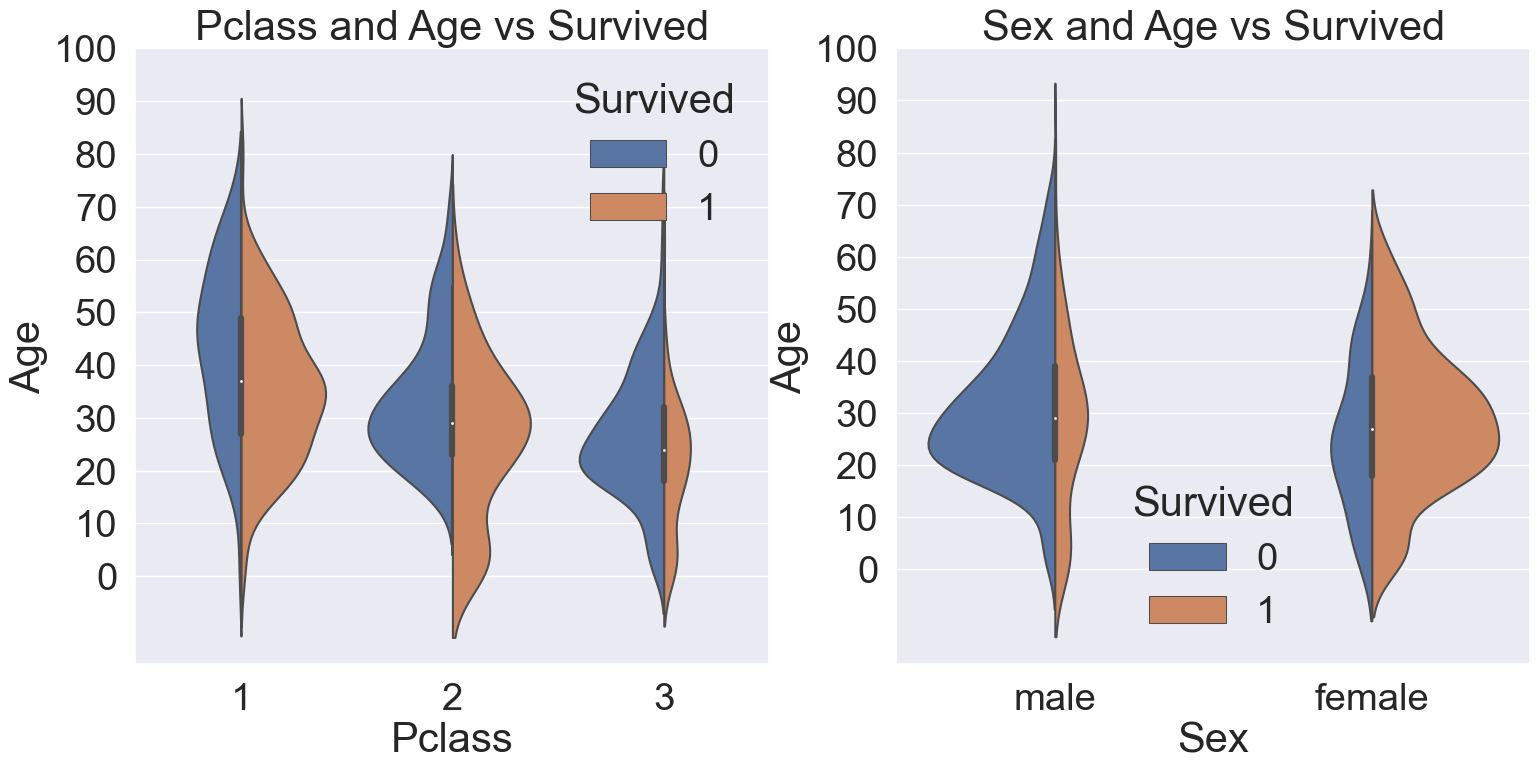

In [21]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

왼쪽 그림은 Pclass별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다. 오른쪽 그림도 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프입니다. 생존만 봤을 때, 모든 클래스에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있습니다. 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한 것을 볼 수 있습니다. 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

## 2-8. Embarked
Embarked는 탑승한 항구를 나타냅니다. 탑승한 곳에 따른 생존률을 보겠습니다.

<AxesSubplot:xlabel='Embarked'>

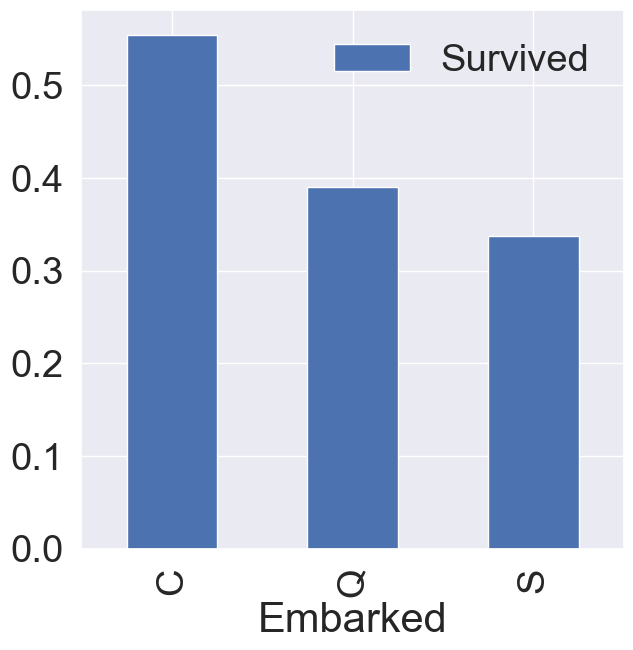

In [22]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

보시다시피, 조금의 차이는 있지만 생존률은 비슷한 것 같습니다. 그래도 C가 제일 높습니다. 모델에 얼마나 큰 영향을 미칠지 모르겠지만, 그래도 사용하겠습니다. <br/>
사실, 모델을 만들면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.

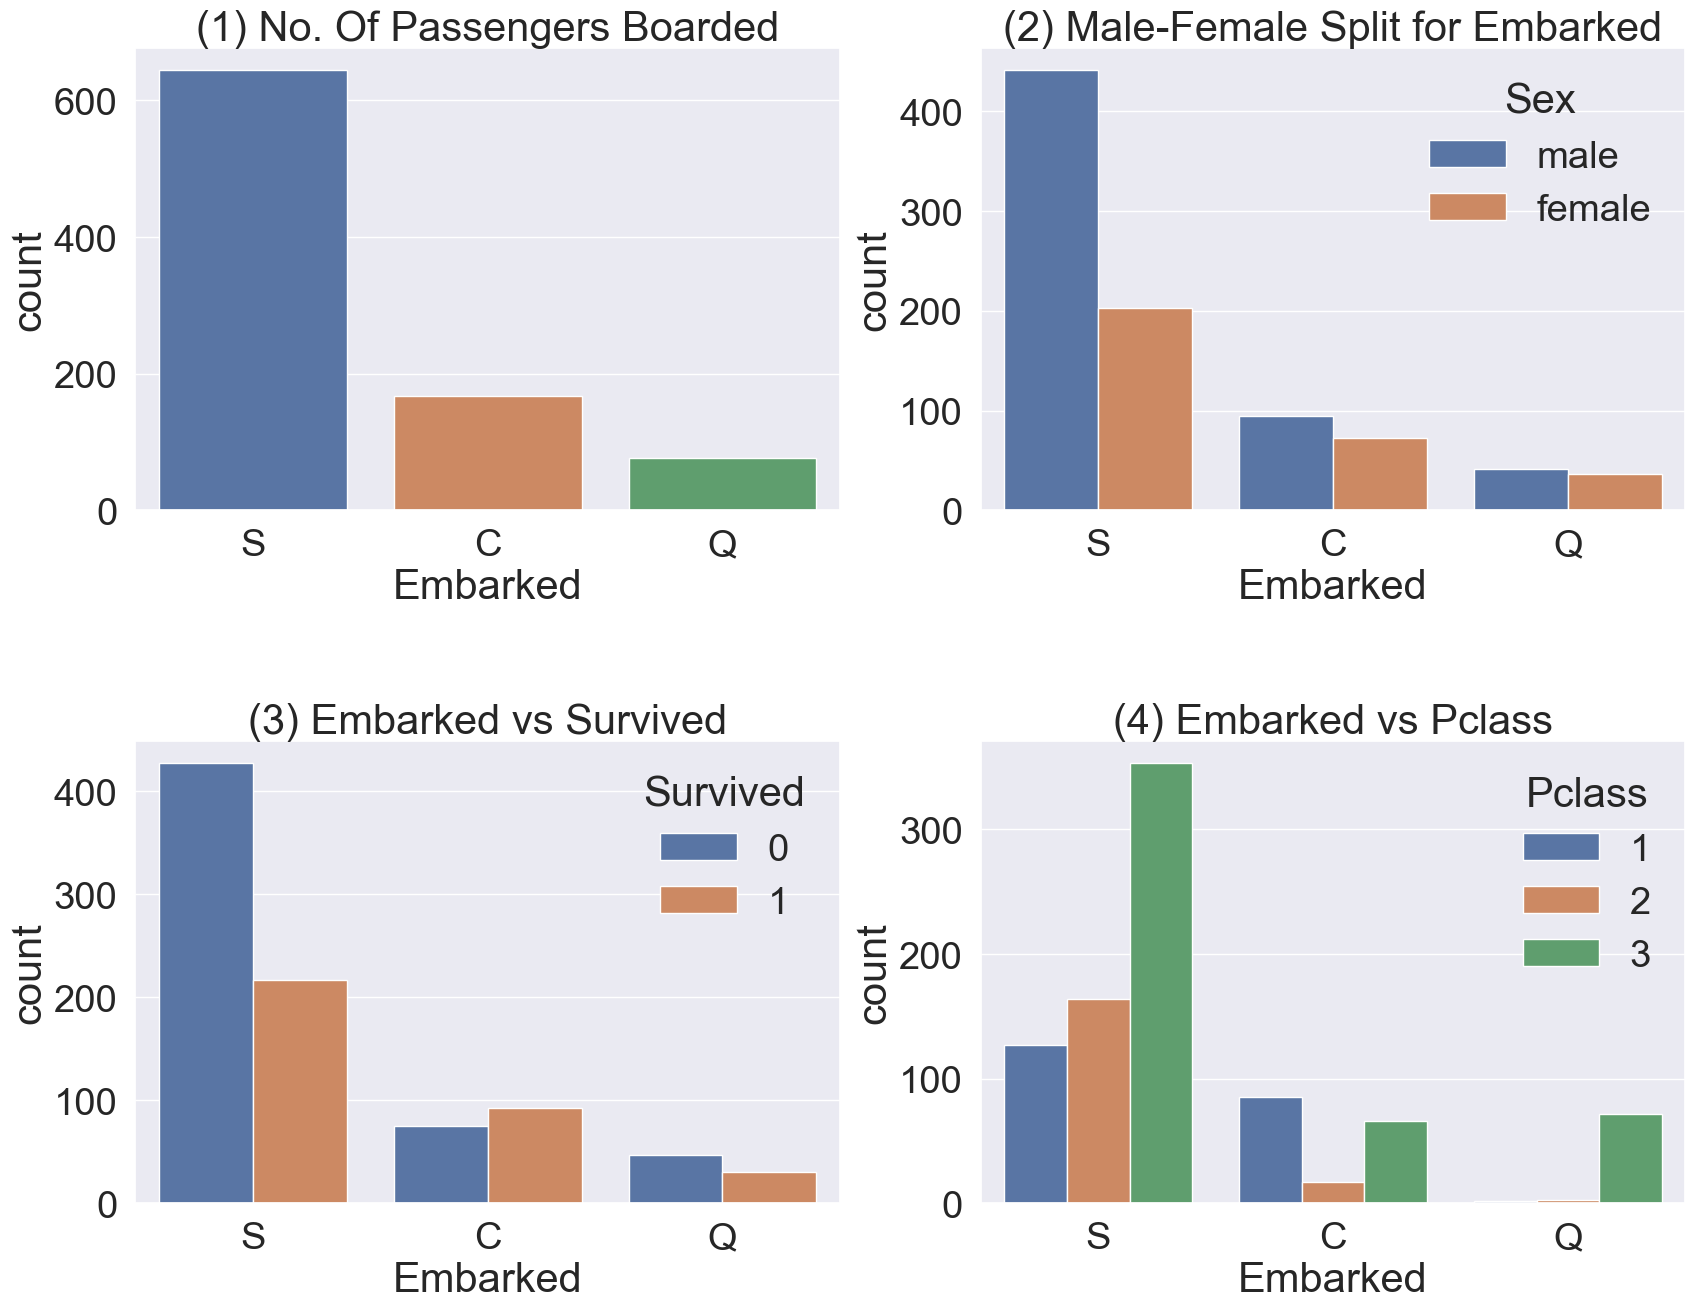

In [24]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- Figure(1): 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했습니다.
- Figure(2): C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3): 생존확률이 S의 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다.)
- Figure(4): Class로 split해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class가 많아서 생존확률이 낮게 나옵니다.

## 2-9. Family - SibSp(형제 자매) + Parch(부모, 자녀)
SibSp와 Parch를 합하면 Family가 될 것입니다. Family로 합쳐서 분석해봅시다.

In [25]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다.

In [26]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


FamilySize와 생존의 관계를 살펴보겠습니다.

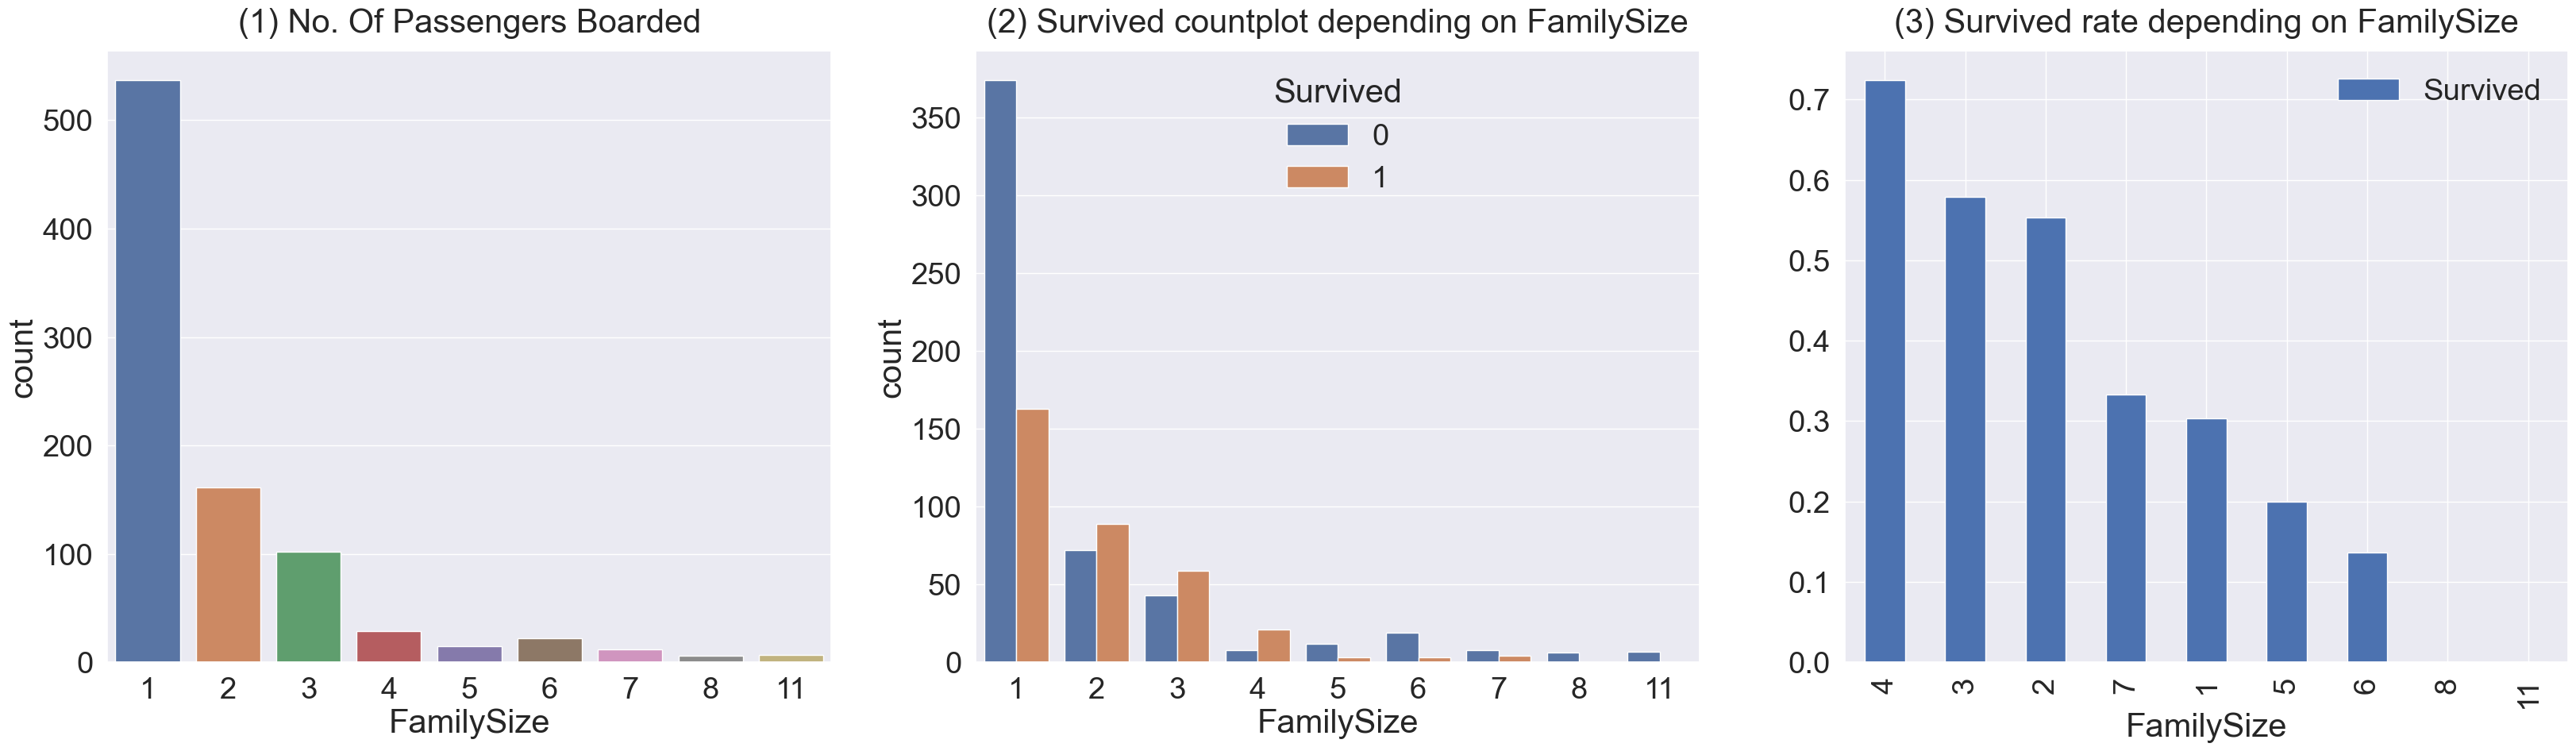

In [27]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- Figure (1): 가족 규모가 1 ~ 11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
- Fiugre (2), (3): 가족 크기에 따른 생존 비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족 수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아집니다. 가족 수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작습니다. 3 ~ 4명 선에서 생존 확률이 높은 걸 확인할 수 있습니다.

## 2-10 Fare
Fare는 탑승요금이며, contious feature입니다. 한 번 histogram을 그려보겠습니다.

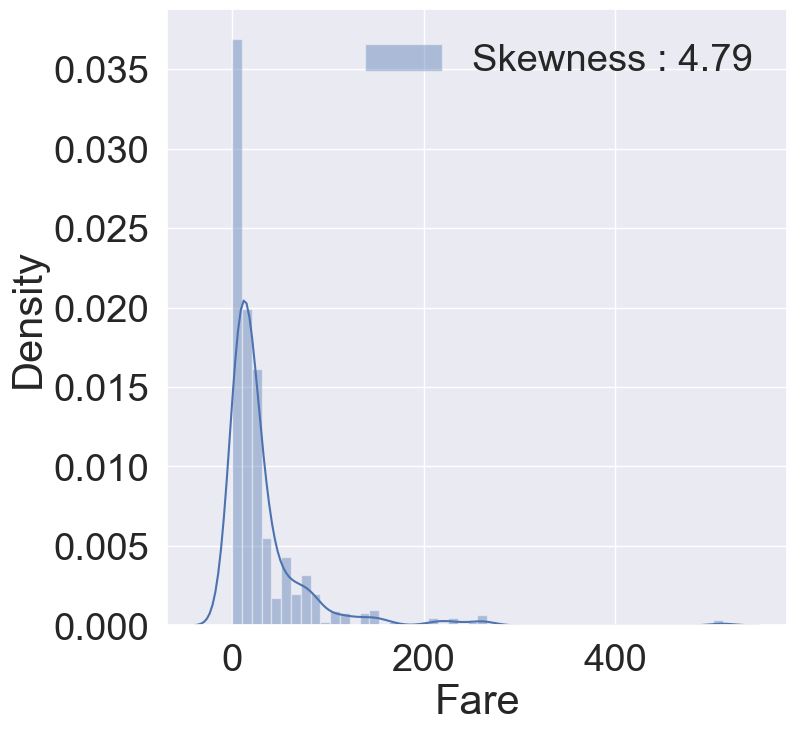

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

- 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다. (high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 있습니다. 몇 개 없는 outlier에 대해 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
- outlier의 영향을 줄이기 위해 Fare에 log를 취하겠습니다.
- 우리는 pandas의 유용한 기능을 사용할 겁니다. dataFrame의 특정 columns에 공통된 작업(함수)을 적용하고 싶으면 아래의 map, 또는 apply를 사용하면 매우 손쉽게 적용할 수 있습니다.
- 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요.

In [29]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test set에 있는 nan value를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

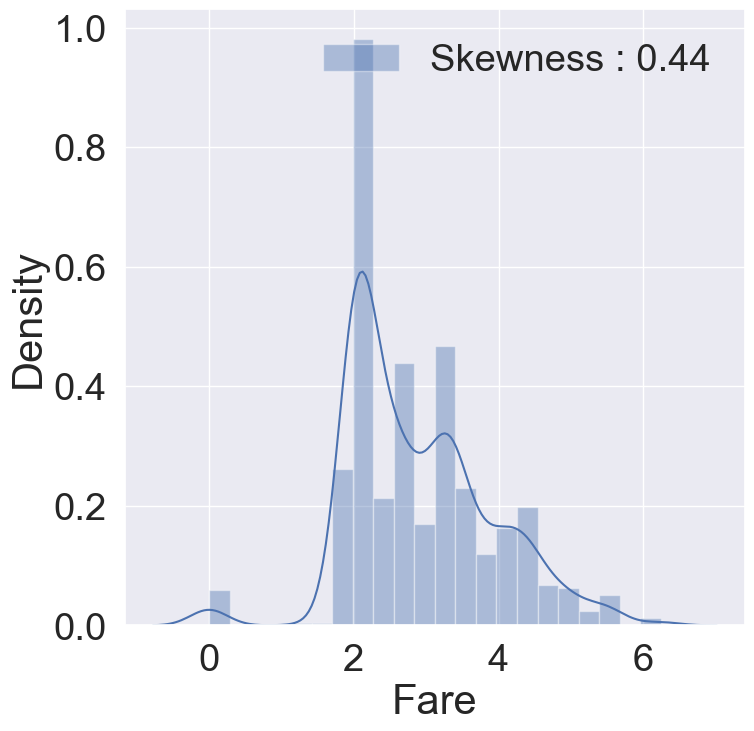

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:,.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

- log를 취하니, 비대칭성이 많이 사라진 것을 볼 수 있습니다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 방금한 것은 feature engineering에 들어가는 부분인데, 여기서 작업했습니다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 이제 그것을 살펴보겠습니다.

## 2-11. Cabin
이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않습니다. 그러므로 모델에 포함시키지 않도록 하겠습니다.

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2-10 Ticket
이 feature는 NaN은 없습니다. 일단 string data이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [34]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

보시다시피, ticket number는 매우 다양합니다.